# 手寫阿拉伯數字辨識 完整版

## 步驟1：載入 MNIST 手寫阿拉伯數字資料

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

# 載入 MNIST 手寫阿拉伯數字資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 訓練/測試資料的 X/y 維度
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [2]:
# 訓練資料前10筆圖片的數字
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [3]:
# 顯示第1張圖片內含值
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [4]:
# 將非0的數字轉為1，顯示第1張圖片
data = x_train[0].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來，隱約可以看出數字為 5
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000001111111111110000',
 '0000000011111111111111110000',
 '0000000111111111111111100000',
 '0000000111111111110000000000',
 '0000000011111110110000000000',
 '0000000001111100000000000000',
 '0000000000011110000000000000',
 '0000000000011110000000000000',
 '0000000000001111110000000000',
 '0000000000000111111000000000',
 '0000000000000011111100000000',
 '0000000000000001111100000000',
 '0000000000000000011110000000',
 '0000000000000011111110000000',
 '0000000000001111111100000000',
 '0000000000111111111000000000',
 '0000000011111111110000000000',
 '0000001111111111000000000000',
 '0000111111111100000000000000',
 '0000111111110000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

In [5]:
# 將非0的數字轉為1，顯示第2張圖片
data = x_train[1].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來，隱約可以看出數字為 0
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000001111100000000',
 '0000000000000011111100000000',
 '0000000000000111111111000000',
 '0000000000011111111111000000',
 '0000000000011111111111000000',
 '0000000000111111111111000000',
 '0000000001111111110011100000',
 '0000000011111100000011100000',
 '0000000111111100000011100000',
 '0000000111100000000011100000',
 '0000000111000000000011100000',
 '0000001111000000000011100000',
 '0000001111000000001111100000',
 '0000001110000000011111000000',
 '0000001110000000111100000000',
 '0000001110000001111000000000',
 '0000001111111111111000000000',
 '0000001111111111100000000000',
 '0000001111111110000000000000',
 '0000000111111100000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

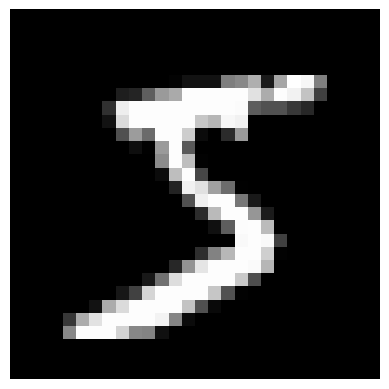

In [6]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[0,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='gray')

# 隱藏刻度
plt.axis('off')

# 顯示圖形
plt.show()

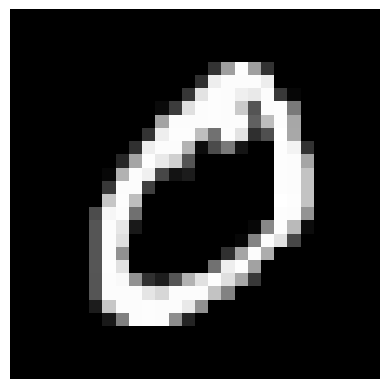

In [7]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[1,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='gray')

# 隱藏刻度
plt.axis('off')

# 顯示圖形
plt.show()

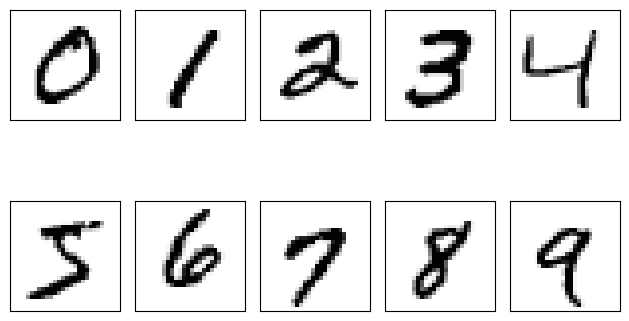

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

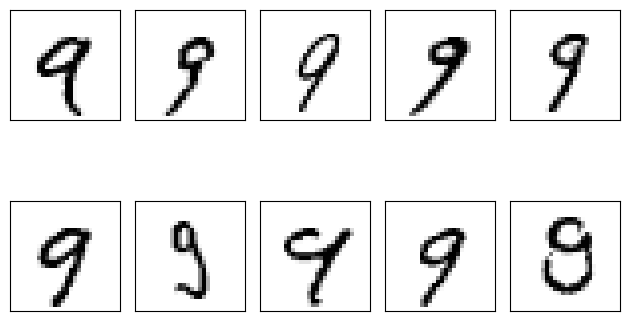

In [9]:
no=9
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == no][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

## 步驟2：資料清理，此步驟無需進行

## 步驟3：進行特徵工程，將特徵縮放成(0, 1)之間

In [10]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## 步驟4：資料分割，此步驟無需進行，載入MNIST資料時，已經切割好了

## 步驟5：建立模型結構

In [11]:
# 建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Input((28, 28)),
  tf.keras.layers.Flatten(),
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 步驟6：結合訓練資料及模型，進行模型訓練

In [13]:
# 模型訓練
# callback: https://ithelp.ithome.com.tw/articles/10234641
# 自訂 callback: https://ithelp.ithome.com.tw/articles/10235293
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 8s 3ms/step - loss: 0.3270 - accuracy: 0.9042 - val_loss: 0.1606 - val_accuracy: 0.9531
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1589 - accuracy: 0.9541 - val_loss: 0.1138 - val_accuracy: 0.9662
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1181 - accuracy: 0.9650 - val_loss: 0.1095 - val_accuracy: 0.9666
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0980 - accuracy: 0.9694 - val_loss: 0.0912 - val_accuracy: 0.9737
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0816 - accuracy: 0.9746 - val_loss: 0.0871 - val_accuracy: 0.9747


In [12]:
# 檢查 history 所有鍵值
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Colab 進行matplotlib繪圖時顯示繁體中文

In [13]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

# import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
# mpl.rc('font', family='Taipei Sans TC Beta')
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

--2024-04-02 11:56:41--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.97.139, 142.250.97.100, 142.250.97.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.97.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-04-02 11:56:41--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.218.132, 2607:f8b0:400c:c14::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.218.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2024-04-02 11:5

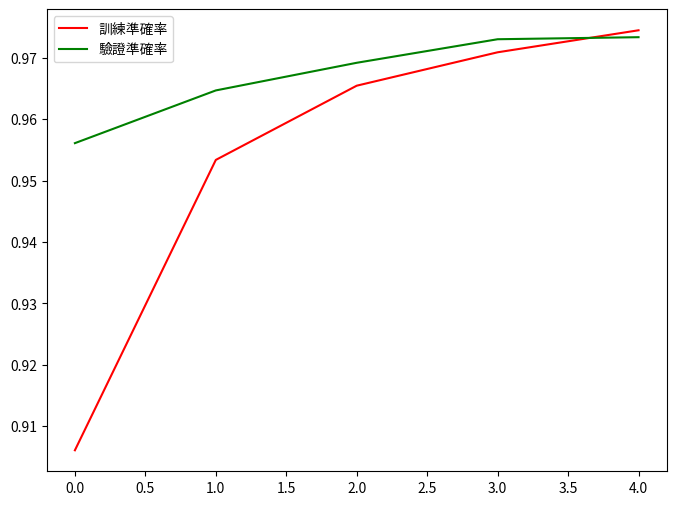

In [14]:
# 對訓練過程的準確率繪圖
# plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], 'r', label='訓練準確率')
plt.plot(history.history['val_accuracy'], 'g', label='驗證準確率')
plt.legend()

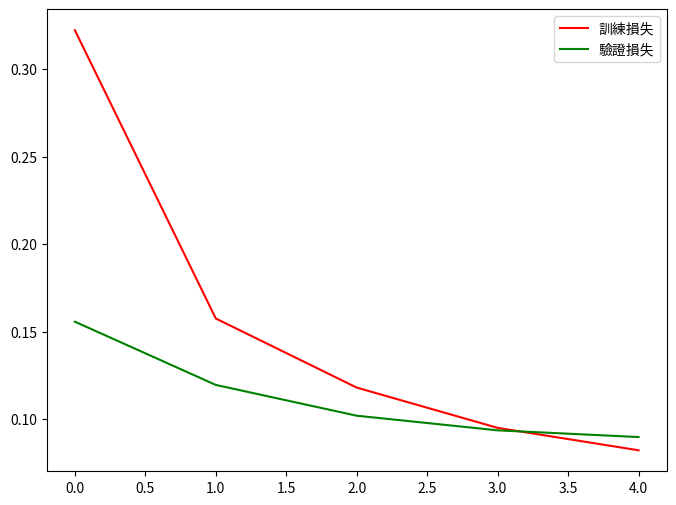

In [15]:
# 對訓練過程的損失繪圖
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], 'r', label='訓練損失')
plt.plot(history.history['val_loss'], 'g', label='驗證損失')
plt.legend()

## 步驟7：評分(Score Model)

In [16]:
# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

loss: 0.0827
accuracy: 0.9733


In [17]:
# 實際預測 20 筆資料
# predictions = model.predict_classes(x_test_norm)
import numpy as np
predictions = np.argmax(model.predict(x_test_norm), axis=-1)

# 比對
print('actual    :', y_test[0:20])
print('prediction:', predictions[0:20])

313/313 [==============================] - 1s 2ms/step
actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
prediction: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [18]:
# 顯示第 9 筆的機率
import numpy as np

predictions = model.predict(x_test_norm[8:9])
print(f'0~9預測機率: {np.around(predictions, 2)}')

1/1 [==============================] - 0s 26ms/step
0~9預測機率: [[0.   0.   0.   0.   0.   0.71 0.29 0.   0.   0.  ]]


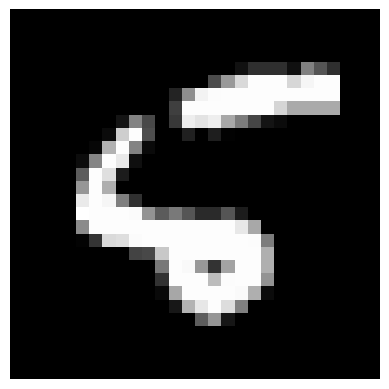

In [19]:
# 顯示第 9 筆圖像
X2 = x_test[8,:,:]
plt.imshow(X2.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show()

## 步驟8：評估，暫不進行

## 步驟9：模型佈署

In [20]:
# 模型存檔
model.save('model.h5')

# 模型載入
model = tf.keras.models.load_model('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 步驟10：新資料預測

## colab 上傳檔案

In [21]:
# 方法1：上傳myDigits.zip檔案
from google.colab import files
list = files.upload()

Saving myDigits.zip to myDigits.zip


In [22]:
# 解壓縮
!unzip myDigits.zip

Archive:  myDigits.zip
   creating: myDigits/
  inflating: myDigits/0.png          
  inflating: myDigits/1.png          
  inflating: myDigits/2.png          
  inflating: myDigits/3.png          
  inflating: myDigits/4.png          
  inflating: myDigits/5.png          
  inflating: myDigits/6.png          
  inflating: myDigits/7.png          
  inflating: myDigits/8.png          
  inflating: myDigits/9.png          


In [24]:
# 方法2：連結雲端硬碟
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls /content/drive -l

total 4
drwx------ 26 root root 4096 Mar 26 23:02 MyDrive/


In [ ]:
!rm /content/myDigits/*.*
!rmdir /content/myDigits

In [ ]:
!unzip "/content/drive/MyDrive/0/myDigits.zip" -d /content

Archive:  /content/drive/MyDrive/0/myDigits.zip
   creating: /content/myDigits/
  inflating: /content/myDigits/0.png  
  inflating: /content/myDigits/1.png  
  inflating: /content/myDigits/2.png  
  inflating: /content/myDigits/3.png  
  inflating: /content/myDigits/4.png  
  inflating: /content/myDigits/5.png  
  inflating: /content/myDigits/6.png  
  inflating: /content/myDigits/7.png  
  inflating: /content/myDigits/8.png  
  inflating: /content/myDigits/9.png  


In [25]:
# 使用小畫家，繪製 0~9，實際測試看看
from skimage import io
from skimage.transform import resize
import numpy as np

# 讀取影像並轉為單色
uploaded_file = './myDigits/9.png'
image1 = io.imread(uploaded_file, as_gray=True)
print(image1.shape)

# 縮為 (28, 28) 大小的影像
image_resized = resize(image1, (28, 28), anti_aliasing=True)
X1 = image_resized.reshape(1,28, 28) #/ 255

# 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
X1 = np.abs(1-X1)

# 預測
#predictions = model.predict_classes(X1)
predictions = np.argmax(model.predict(X1, verbose=0), axis=-1)
print(predictions)

(280, 280)
[7]


In [26]:
model.predict(X1, verbose=0)

array([[3.6639280e-03, 5.1990310e-03, 5.7869679e-03, 5.9920945e-03,
        3.3434397e-03, 1.7114492e-03, 4.4926328e-05, 8.8219565e-01,
        2.4209162e-03, 8.9641556e-02]], dtype=float32)

In [ ]:
np.sum(model.predict(X1, verbose=0))

0.99999994

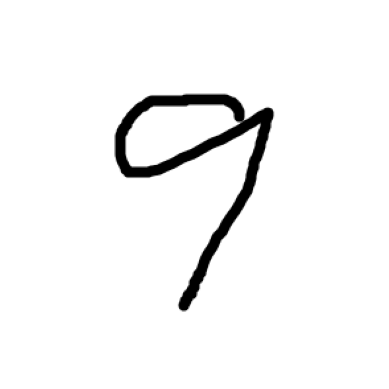

In [ ]:
# 繪製點陣圖，cmap='gray':灰階
plt.imshow(image1, cmap='gray')

# 隱藏刻度
plt.axis('off')

# 顯示圖形
plt.show()

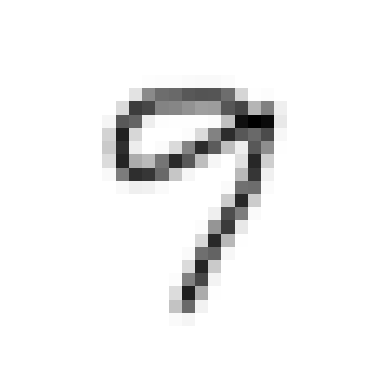

In [ ]:
# 繪製點陣圖，cmap='gray':灰階
plt.imshow(image_resized, cmap='gray')

# 隱藏刻度
plt.axis('off')

# 顯示圖形
plt.show()

In [27]:
# 讀取影像並轉為單色
for i in range(10):
    uploaded_file = f'./myDigits/{i}.png'
    image1 = io.imread(uploaded_file, as_gray=True)

    # 縮為 (28, 28) 大小的影像
    image_resized = resize(image1, (28, 28), anti_aliasing=True)
    X1 = image_resized.reshape(1,28, 28) #/ 255

    # 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
    X1 = np.abs(1-X1)

    # 預測
    #predictions = model.predict_classes(X1)
    predictions = np.argmax(model.predict(X1, verbose=0), axis=-1)
    print(predictions)

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[3]
[8]
[7]


## 其他：顯示模型彙總資訊(summary)、繪製圖形顯示模型結構

In [ ]:
# 顯示模型的彙總資訊
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


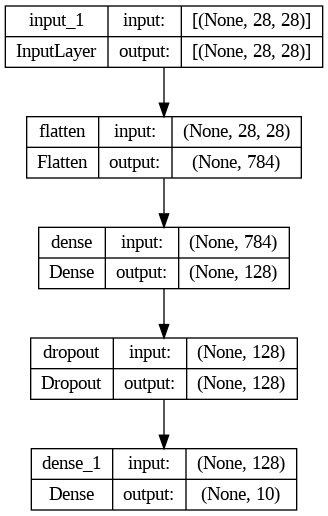

In [28]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
import pandas as pd
predictions = np.argmax(model.predict(x_test_norm, verbose=0), axis=-1)
pd.crosstab(y_test, predictions, rownames=['實際值'], colnames=['預測值'])

預測值,0,1,2,3,4,5,6,7,8,9
實際值,,,,,,,,,,
0,973,0,0,1,0,0,2,0,3,1
1,0,1123,4,0,0,1,2,0,5,0
2,7,0,1015,1,0,0,2,4,3,0
3,0,0,8,987,0,3,0,5,5,2
4,2,0,3,1,939,0,7,2,3,25
5,2,1,0,8,0,865,5,2,7,2
6,6,3,1,1,1,5,937,0,4,0
7,1,6,20,2,0,0,0,990,2,7
8,4,0,2,4,0,3,1,2,957,1


In [ ]:
import sklearn.metrics
sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=np.argmax(model.predict(x_test_norm, verbose=0), axis=-1))

array([[ 973,    0,    0,    1,    0,    0,    2,    0,    3,    1],
       [   0, 1123,    4,    0,    0,    1,    2,    0,    5,    0],
       [   7,    0, 1015,    1,    0,    0,    2,    4,    3,    0],
       [   0,    0,    8,  987,    0,    3,    0,    5,    5,    2],
       [   2,    0,    3,    1,  939,    0,    7,    2,    3,   25],
       [   2,    1,    0,    8,    0,  865,    5,    2,    7,    2],
       [   6,    3,    1,    1,    1,    5,  937,    0,    4,    0],
       [   1,    6,   20,    2,    0,    0,    0,  990,    2,    7],
       [   4,    0,    2,    4,    0,    3,    1,    2,  957,    1],
       [   2,    5,    0,    9,    3,    6,    1,    5,    5,  973]])

In [ ]:
model.get_config()

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': 'float32',
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name'

In [ ]:
model.get_weights()

[array([[ 0.03755701, -0.00994749,  0.02887236, ..., -0.06420344,
          0.01017624,  0.00293259],
        [-0.02695769, -0.00740017,  0.06690421, ..., -0.07422867,
         -0.04681756,  0.02061807],
        [-0.07596589, -0.06994119,  0.03837877, ..., -0.08051704,
         -0.0491013 , -0.04360632],
        ...,
        [-0.00814692,  0.04879301,  0.07337945, ..., -0.00051744,
          0.06193542, -0.00069326],
        [-0.01762481,  0.05643395, -0.0171533 , ..., -0.04765019,
         -0.06958468,  0.07229444],
        [-0.04533692,  0.05071156, -0.01943642, ...,  0.0286788 ,
         -0.05707357,  0.03970878]], dtype=float32),
 array([ 0.02138399,  0.08123776,  0.05733528, -0.0025123 , -0.02325936,
         0.01659747,  0.05805313,  0.15269022,  0.14174588,  0.04523679,
        -0.04684573,  0.06623857, -0.00508539, -0.0045796 , -0.00157205,
         0.10775739,  0.14417395, -0.09190463, -0.04854456, -0.07181101,
         0.125708  ,  0.00738764, -0.06089206, -0.04353882,  0.039

In [ ]:
model.get_layer(index=1).name

'dense'

In [ ]:
model.get_layer(index=1).get_weights()

[array([[ 0.03755701, -0.00994749,  0.02887236, ..., -0.06420344,
          0.01017624,  0.00293259],
        [-0.02695769, -0.00740017,  0.06690421, ..., -0.07422867,
         -0.04681756,  0.02061807],
        [-0.07596589, -0.06994119,  0.03837877, ..., -0.08051704,
         -0.0491013 , -0.04360632],
        ...,
        [-0.00814692,  0.04879301,  0.07337945, ..., -0.00051744,
          0.06193542, -0.00069326],
        [-0.01762481,  0.05643395, -0.0171533 , ..., -0.04765019,
         -0.06958468,  0.07229444],
        [-0.04533692,  0.05071156, -0.01943642, ...,  0.0286788 ,
         -0.05707357,  0.03970878]], dtype=float32),
 array([ 0.02138399,  0.08123776,  0.05733528, -0.0025123 , -0.02325936,
         0.01659747,  0.05805313,  0.15269022,  0.14174588,  0.04523679,
        -0.04684573,  0.06623857, -0.00508539, -0.0045796 , -0.00157205,
         0.10775739,  0.14417395, -0.09190463, -0.04854456, -0.07181101,
         0.125708  ,  0.00738764, -0.06089206, -0.04353882,  0.039

In [ ]:
model.count_params()

101770